In [1]:
import os
os.environ['PYTHONPATH']

'/home/mourad/DS/FairHomes'

In [2]:
import sys
sys.path.append('/home/mourad/DS/Mosmovi/Mosmovi/')

In [3]:
import pandas as pd
import os
import numpy as np
from utils import Processing as PR, text_preprocessing as TP
import multiprocessing as mp
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

pd.set_option('max_columns', None)
pd.set_option('display.max_rows', 100)
from collections import Counter

ImportError: cannot import name 'Processing' from 'utils' (/home/mourad/DS/Mosmovi/Mosmovi/utils.py)

In [ ]:
import importlib
import utils.Processing #import the module here, so that it can be reloaded.
importlib.reload(utils.Processing)

In [7]:
%%time
df = PR.format_csvs_to_df('../../data/Copy of dev_south_america_merged/')
# df = pd.read_csv('../data/formated.csv')
df = df.drop_duplicates(subset=['id'])
print(df.shape)

(6805412, 35)
CPU times: user 1min 39s, sys: 11.3 s, total: 1min 50s
Wall time: 1min 52s


In [8]:
%%time
df['created_at'] = pd.to_datetime(df['created_at'])
df['lat'], df['long'] = df.coordinates.apply(lambda x : x[0]), df.coordinates.apply(lambda x : x[1])
df['id'] = df['id'].astype(np.int64).astype(str)
df['conversation_id'] = df['conversation_id'].fillna(0).astype(np.int64).astype(str)
df['in_reply_to_user_id'] = df['in_reply_to_user_id'].fillna(0).astype(np.int64).astype(str)
df['author_id'] = df['author_id'].fillna(0).astype(np.int64).astype(str)
# df['geo_country'] = df['geo_country'].apply(lambda x : PR.rename_coutries(x)) 

CPU times: user 19.4 s, sys: 1.22 s, total: 20.6 s
Wall time: 20.6 s


In [9]:
%%time
# df.to_csv('../../data/formated.csv')

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.53 µs


In [10]:
print(df.shape)
# df.id.value_counts()

(6805412, 37)


In [11]:
df.sort_values('id').head()

,lang,id,created_at,text,conversation_id,in_reply_to_user_id,reply_settings,source,possibly_sensitive,geo_place_id,geo_place_type,geo_country,geo_full_name,geo_country_code,geo_geo_type,geo_geo_bbox,geo_geo_properties,author_id,author_profile_image_url,author_username,author_url,author_name,author_created_at,author_verified,author_protected,author_description,retweet_count,reply_count,like_count,quote_count,followers_count,following_count,tweet_count,listed_count,coordinates,lat,long
2821,es,1356210702650904576,2021-02-01 12:00:03+00:00,Acaba de publicar una foto en Urbanización San...,1356210702650904576,0,everyone,Instagram,True,0176ea0c39765f09,city,Venezuela,"San Francisco, Venezuela",VE,NaN,"[-71.6788483, 10.5293207, -71.6111978, 10.5961...",{},2471875070,https://pbs.twimg.com/profile_images/127973853...,renelop97965381,NaN,INMOBILIARIA ASESOR ESOR René Lopez K.L MARCAIBO,2014-05-01T03:37:13.000Z,False,False,NaN,0.0,0.0,0.0,0.0,3,3,740,0,"[10.260839184739002, -71.97499804311941]",10.260839,-71.974998
2820,es,1356210748637241344,2021-02-01 12:00:14+00:00,El lunes ya me empezó mal 🥳.,1356210748637241344,0,everyone,Twitter for iPhone,False,002e2add0d1ff144,city,Venezuela,"Ciudad Ojeda, Venezuela",VE,NaN,"[-71.3538208, 10.1781855, -71.2887573, 10.2315...",{},116914586,https://pbs.twimg.com/profile_images/134374322...,Saidyaraujo,https://t.co/dShomYDPG4,Saidy,2010-02-23T23:56:07.000Z,False,False,Post Nubila Phoebus. 🌤,0.0,1.0,0.0,0.0,796,423,38182,6,"[10.260839184739002, -71.97499804311941]",10.260839,-71.974998
4671,es,1356210789477191680,2021-02-01 12:00:24+00:00,@AndresCjn41 @Maridon13335354 Las cajitas Erót...,1353150416972881920,3057698002,everyone,Twitter for Android,False,0170d9df339a9451,city,Colombia,"Riohacha, Colombia",CO,NaN,"[-73.3878010031889, 10.907056003372, -72.60212...",{},1351759796983181312,https://pbs.twimg.com/profile_images/135176020...,puntog_tienda,https://t.co/na293qCNhD,PuntoGTienda,2021-01-20T05:14:27.000Z,False,False,Somos los cómplices perfectos del Placer ❤️ En...,0.0,0.0,0.0,0.0,37,24,22,0,"[11.343964420474848, -72.29185226444467]",11.343964,-72.291852
3482,es,1356210882355802112,2021-02-01 12:00:46+00:00,"Pues crealooo,porque no me leí nada de eso pro...",1356210882355802112,0,everyone,Twitter for iPhone,False,01030be40ff4ff39,city,Colombia,"Sahagún, Colombia",CO,NaN,"[-75.5609759988304, 8.56956300178352, -75.2774...",{},1115724327435956224,https://pbs.twimg.com/profile_images/142053884...,ChechooSerpa,NaN,Chechoo_Serpa🌞.,2019-04-09T21:13:03.000Z,False,False,Estudiante de Derecho 👨‍🎓 ⚖️,0.0,0.0,3.0,0.0,63,262,2024,0,"[8.633174749054467, -75.40033266090484]",8.633175,-75.400333
5623,es,1356210903507750912,2021-02-01 12:00:51+00:00,Todos esos barberos intensos me dan como ladil...,1356210903507750912,0,everyone,Twitter for Android,False,015e5397777769a2,city,Venezuela,"Mérida, Venezuela",VE,NaN,"[-71.1957474, 8.5660877, -71.1269677, 8.631216]",{},199494386,https://pbs.twimg.com/profile_images/144149718...,mierdatilin,NaN,siyei,2010-10-07T00:46:57.000Z,False,False,Pórtate bien,0.0,0.0,0.0,0.0,374,145,17710,0,"[8.635918710683876, -71.56215985722785]",8.635919,-71.562160


### Duplicates

In [12]:
%%time 
df_dupli_sort = df[df.duplicated('id')].sort_values('id')

CPU times: user 6.51 s, sys: 3.14 s, total: 9.65 s
Wall time: 9.68 s


In [13]:
df_dupli_sort[['id', 'created_at', 'text','geo_geo_bbox', 'coordinates']].head(10)

,id,created_at,text,geo_geo_bbox,coordinates


### Date

In [14]:
%%time
(min(df.created_at), max(df.created_at))

CPU times: user 19.5 s, sys: 4.08 ms, total: 19.5 s
Wall time: 19.5 s


(Timestamp('2021-02-01 12:00:03+0000', tz='UTC'),
 Timestamp('2021-09-01 11:59:59+0000', tz='UTC'))

### Lattitude / Longitude

In [15]:
print('latitude:', min(df.lat), max(df.lat))
print('longitude:',min(df.long), max(df.long))

latitude: -54.69321231192183 12.429793434161136
longitude: -91.17963727111682 -32.18832508121774


### Categorical values count

#### Languages

In [16]:
df.lang.value_counts().head()

pt     3479506
es     2236153
und     738817
en      161558
it       31656
Name: lang, dtype: int64

In [17]:
df_lang = pd.DataFrame(df.lang.value_counts()).reset_index().rename(columns={'index':'languages', 'lang':'count'})
df_lang.loc[len(df.index)] = ['other', df_lang.loc[df_lang['count']<280886]['count'].sum()]

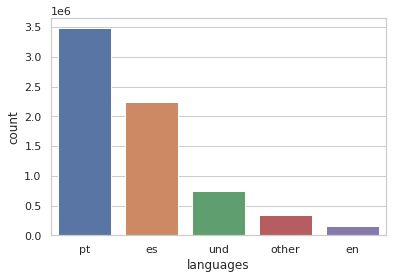

In [18]:
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="languages", y="count", data=df_lang.sort_values('count', ascending=False).head())

#### Reply settings
everyone, following, mentionedUsers, other

In [19]:
df.reply_settings.value_counts()

everyone          6774157
following           14886
mentionedUsers       3258
other                  11
Name: reply_settings, dtype: int64

#### Source

In [20]:
df.source.value_counts()

Twitter for Android                4798302
Twitter for iPhone                 1713818
Instagram                           232254
Central132                           20881
Foursquare                            5552
                                    ...   
Falcon Social Media Management           1
Twitterrific for iOS                     1
Twitter for  iPhone                      1
Oktopost                                 1
morning_relay                            1
Name: source, Length: 114, dtype: int64

#### Possibly sensitive

In [21]:
df.possibly_sensitive.value_counts()

False    6731228
True       61084
Name: possibly_sensitive, dtype: int64

([<matplotlib.patches.Wedge at 0x7fcddcde5280>,
 [Text(-1.0995610133141953, 0.031073750971842957, ''),
  Text(1.099561015223444, -0.031073683412000556, '')],
 [Text(-0.5997605527168338, 0.016949318711914338, '99%'),
  Text(0.5997605537582421, -0.01694928186109121, '1%')])

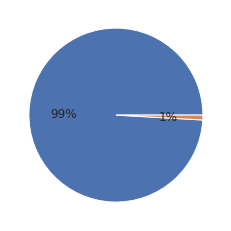

In [22]:
plt.pie(df.possibly_sensitive.value_counts(), autopct='%.0f%%')

#### Geo Country Code

In [23]:
df.geo_country_code.value_counts().head()

BR    4175801
CO    1013740
AR     541390
VE     427260
CL     323167
Name: geo_country_code, dtype: int64

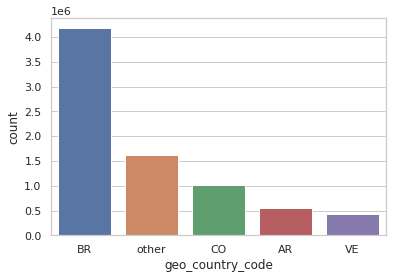

In [24]:
df_cocode = pd.DataFrame(df.geo_country_code.value_counts())\
    .reset_index().rename(columns={'index':'geo_country_code', 'geo_country_code':'count'})
df_cocode.loc[len(df.index)] = ['other', df_cocode.loc[df_cocode['count']<546745]['count'].sum()]
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="geo_country_code", y="count", data=df_cocode.sort_values('count', ascending=False).head())

<AxesSubplot:>

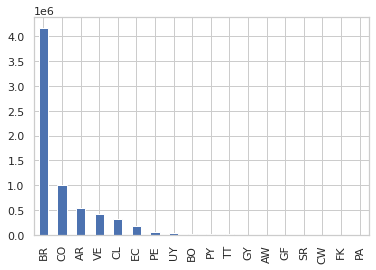

In [25]:
df.geo_country_code.value_counts().plot.bar()

In [26]:
df.geo_country.value_counts()

Brésil                         2051695
Brazil                         1511804
Colombia                       1013740
Brasile                         597979
Venezuela                       427260
Argentina                       386861
Chile                           185721
Ecuador                         173059
Argentine                       154529
Chili                           137446
Peru                             55105
Uruguay                          36142
Brasilien                        14323
Paraguay                         13601
Bolivie                          13290
Trinidad and Tobago              11693
Bolivia                           7478
Guyana                            4788
Aruba                             4319
Fransk Guyana                     2080
Suriname                          1313
Curaçao                            390
Falkland Islands (Malvinas)        192
French Guiana                       18
Panama                              18
Name: geo_country, dtype:

In [27]:
df.geo_full_name.value_counts()

Rio de Janeiro, Brésil      437618
São Paulo, Brésil           400094
Bogotá, D.C., Colombia      298762
Medellín, Colombia           93390
Córdoba, Argentina           92947
                             ...  
Carvoeira, Florianópolis         1
Centrinho da Lagoa               1
Caminhada na Raul Lopes          1
Vitoria Eco Office               1
Parque Croacia                   1
Name: geo_full_name, Length: 27733, dtype: int64

In [28]:
df.geo_geo_properties.value_counts()

{}    6804926
Name: geo_geo_properties, dtype: int64

In [29]:
df.author_verified.value_counts()

False    6765395
True       40017
Name: author_verified, dtype: int64

In [30]:
df.author_protected.value_counts()

False    6805412
Name: author_protected, dtype: int64

In [31]:
df.author_protected.value_counts()

False    6805412
Name: author_protected, dtype: int64

### NLP

In [32]:
df_nlp = df[['lang', 'id','text','geo_country_code','coordinates', 'lat', 'long','author_description','author_username','author_name', 'geo_country', 'geo_full_name']]


### Length of text

In [33]:
df_nlp['length_text'] = df_nlp['text'].apply(lambda x: len(str(x)))

<ipython-input-33-ba089dfa894a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nlp['length_text'] = df_nlp['text'].apply(lambda x: len(str(x)))


In [34]:
df_nlp['length_text'].value_counts()

23     159251
25     101545
35      97285
36      96258
38      95370
        ...  
992         1
984         1
991         1
993         1
580         1
Name: length_text, Length: 981, dtype: int64

<AxesSubplot:ylabel='Frequency'>

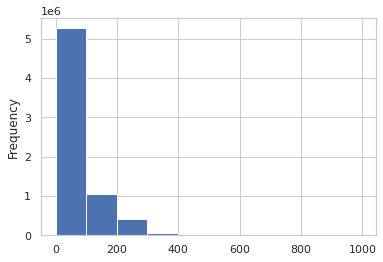

In [35]:
df_nlp['length_text'].plot.hist()

In [36]:
%%time
# df_nlp['tokenized_text'] = df_nlp.text.apply(lambda x : word_tokenize(str(x)))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [49]:
from nltk.tokenize import TweetTokenizer

def toto(x):
    tweet_tokenizer = TweetTokenizer()
    return tweet_tokenizer.tokenize(str(x))

In [50]:
%%time
p = mp.Pool(mp.cpu_count()-2) # Data parallelism Object
df_nlp['tokenized_text'] = p.map(toto, df_nlp['text']) 


CPU times: user 39.3 s, sys: 5.93 s, total: 45.3 s
Wall time: 53.8 s


<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [51]:
' '.join(df_nlp['tokenized_text'].iloc[2])

'Lo más sexi que verás este día bebé 😉 #ghigoflow #papirey #soymetedor en Ciudad Trinidad , El Beni , Bolivia https://t.co/BqdNZofb8n'

At the end, tokenizing and counting tokens is useless if we use character level to do our prediction. 

## Test and draft

In [39]:
# tokens = set()
# for x in df_nlp['tokenized_text']:
#     tokens = tokens.union(set(x))
# print(len(tokens))

In [71]:
def union_tok(list_of_lists):
    tokens = set().union(*list_of_lists)
#     for x in list_of_set:
#         tokens = tokens.union(set(x))
# #         print(set(x).union(tokens))
    return tokens
        

In [67]:
set().union(*df_nlp['tokenized_text'].iloc[:10])

{'#',
 '&',
 "''",
 '(',
 ')',
 ',',
 '-',
 '.',
 '//t.co/18HhXGxB6S',
 '//t.co/6VoA1IIapP',
 '//t.co/B3dbD7WgjK',
 '//t.co/BqdNZofb8n',
 '//t.co/CLDsduAnrq',
 '//t.co/DRE79J58qF',
 '//t.co/S9flo1veqk',
 '//t.co/haB2tFbNV8',
 '//t.co/l9W3ki5CUW',
 '//t.co/vPu2hVlHQm',
 '29',
 '38°',
 ':',
 '?',
 '@',
 'Acaba',
 'Ballivián',
 'Beni',
 'Bolivia',
 'Calle',
 'Ciudad',
 'Combatiendo',
 'Creemos',
 'Current',
 'Deportes',
 'El',
 'Escuela',
 'Hoy',
 'Inauguración',
 'Just',
 'Keep',
 'Lo',
 'Mamore',
 'Mate',
 'Naval',
 'Partly',
 'Puerto',
 'Sucre',
 'Sul',
 'Trinidad',
 'Vallejos',
 '``',
 'a',
 'adorno',
 'bebé',
 'beni',
 'bolivia',
 'celsius',
 'cloudy',
 'cuentosdeevaluna🌙🍃',
 'cura',
 'de',
 'debut',
 'degrees',
 'do',
 'día',
 'ecuelas',
 'el',
 'en',
 'este',
 'first',
 'foto',
 'frío',
 'fútbol',
 'gaúcho',
 'ghigoflow',
 'goodmemories❤️',
 'gt',
 'hace',
 'https',
 'in',
 'isabelallende',
 'jovenes',
 'los',
 'más',
 'no',
 'o',
 'of',
 'papirey',
 'photo',
 'posted',
 'publicar'

In [74]:
union_tok(df_nlp['tokenized_text'].iloc[:10])

{'#',
 '&',
 "''",
 '(',
 ')',
 ',',
 '-',
 '.',
 '//t.co/18HhXGxB6S',
 '//t.co/6VoA1IIapP',
 '//t.co/B3dbD7WgjK',
 '//t.co/BqdNZofb8n',
 '//t.co/CLDsduAnrq',
 '//t.co/DRE79J58qF',
 '//t.co/S9flo1veqk',
 '//t.co/haB2tFbNV8',
 '//t.co/l9W3ki5CUW',
 '//t.co/vPu2hVlHQm',
 '29',
 '38°',
 ':',
 '?',
 '@',
 'Acaba',
 'Ballivián',
 'Beni',
 'Bolivia',
 'Calle',
 'Ciudad',
 'Combatiendo',
 'Creemos',
 'Current',
 'Deportes',
 'El',
 'Escuela',
 'Hoy',
 'Inauguración',
 'Just',
 'Keep',
 'Lo',
 'Mamore',
 'Mate',
 'Naval',
 'Partly',
 'Puerto',
 'Sucre',
 'Sul',
 'Trinidad',
 'Vallejos',
 '``',
 'a',
 'adorno',
 'bebé',
 'beni',
 'bolivia',
 'celsius',
 'cloudy',
 'cuentosdeevaluna🌙🍃',
 'cura',
 'de',
 'debut',
 'degrees',
 'do',
 'día',
 'ecuelas',
 'el',
 'en',
 'este',
 'first',
 'foto',
 'frío',
 'fútbol',
 'gaúcho',
 'ghigoflow',
 'goodmemories❤️',
 'gt',
 'hace',
 'https',
 'in',
 'isabelallende',
 'jovenes',
 'los',
 'más',
 'no',
 'o',
 'of',
 'papirey',
 'photo',
 'posted',
 'publicar'

In [81]:
set.union(*[set(x) for x in df_nlp['tokenized_text'].iloc[:10]])

{'#',
 '&',
 "''",
 '(',
 ')',
 ',',
 '-',
 '.',
 '//t.co/18HhXGxB6S',
 '//t.co/6VoA1IIapP',
 '//t.co/B3dbD7WgjK',
 '//t.co/BqdNZofb8n',
 '//t.co/CLDsduAnrq',
 '//t.co/DRE79J58qF',
 '//t.co/S9flo1veqk',
 '//t.co/haB2tFbNV8',
 '//t.co/l9W3ki5CUW',
 '//t.co/vPu2hVlHQm',
 '29',
 '38°',
 ':',
 '?',
 '@',
 'Acaba',
 'Ballivián',
 'Beni',
 'Bolivia',
 'Calle',
 'Ciudad',
 'Combatiendo',
 'Creemos',
 'Current',
 'Deportes',
 'El',
 'Escuela',
 'Hoy',
 'Inauguración',
 'Just',
 'Keep',
 'Lo',
 'Mamore',
 'Mate',
 'Naval',
 'Partly',
 'Puerto',
 'Sucre',
 'Sul',
 'Trinidad',
 'Vallejos',
 '``',
 'a',
 'adorno',
 'bebé',
 'beni',
 'bolivia',
 'celsius',
 'cloudy',
 'cuentosdeevaluna🌙🍃',
 'cura',
 'de',
 'debut',
 'degrees',
 'do',
 'día',
 'ecuelas',
 'el',
 'en',
 'este',
 'first',
 'foto',
 'frío',
 'fútbol',
 'gaúcho',
 'ghigoflow',
 'goodmemories❤️',
 'gt',
 'hace',
 'https',
 'in',
 'isabelallende',
 'jovenes',
 'los',
 'más',
 'no',
 'o',
 'of',
 'papirey',
 'photo',
 'posted',
 'publicar'

In [83]:
%%time
pool = mp.Pool(processes=int(os.cpu_count()/2))
tokens = pool.map(union_tok, [set(x) for x in df_nlp['tokenized_text']]) # Returns a list of lists

CPU times: user 1min 12s, sys: 15.7 s, total: 1min 28s
Wall time: 1min 29s


In [88]:
len(set().union(tokens))

TypeError: unhashable type: 'set'

In [ ]:
for x, y in df_nlp.iloc[100:110].iterrows():
    print(x, y.text)
    print(word_tokenize(y.text))
    print('\n')

In [ ]:
%%time
df_nlp.text = df_nlp.text.apply(lambda x : TP.preprocess(str(x))) 

In [ ]:
for x, y in df_nlp.iloc[100:110].iterrows():
    print(x, y.text)
    print(x, TP.remove_URL(y.text))
    print('--')
    print(word_tokenize(y.text)[-4:])
    print(y.geo_full_name)
    print(y.author_name, y.author_username)
    print('\n')


In [ ]:
word_tokenize(df_nlp.text.iloc[0])

In [ ]:
df_nlp['']